Añade al archivo "3.regression_classification_exercise" del CW8D4/exercises, todos los algoritmos que hemos visto. Estos son:

### Regresión:

- Linear Regression - D
- SVM (versión regresión SVR) - D
- Polinominal Regression - D
- Random Forest (versión regresión) -D

### Clasificación:

- SVM (versión regresión SVC) - D
- Knn - D
- Random Forest (versión clasificación) - D
- Xgboost (si todo OK) - D
- Logistic regression - D

Haz que se puedan ejecutar de forma genérica para varias features de los algoritmos. Por ejemplo, que se ejecute con "param" para diferentes grados del polinomio y para usar diferentes kernels en SVM. 

In [5]:
 import os

def file_exists(filepath):
    if os.path.exists(filepath):
        return True
    else:
        return False
    
def rename_filename(filepath, number=1):
    name = os.path.splitext(filepath)[0]
    extension = os.path.splitext(filepath)[1]

    name += "_" + str(number)
    filepath = name + extension
    if file_exists(filepath):
        return rename_filename(filepath=filepath, number=number+1)
    else:
        return filepath

 def save_model(to_save, filepath):
    import pickle

    try:
        if file_exists(filepath=filepath):
            filepath = rename_filename(filepath=filepath)
        pickle.dump(to_save, open(filepath, 'wb'))
        print("Saved successfully")
        return True, filepath
    except Exception as e:
        print("Error during saving model:\n", e)
        return False, filepath


def choose_model(option_user, **params):
    if int(option_user) == 1:
        model_option = input("Which model do you want to use?                                                                              1 = LinearRegression 2 = PolynomialFeatures 3 = SVM - SVR                                                    4 =  RandomForestRegressor")
        option_user = int(model_option)
        if option_user == 1:
            from sklearn.linear_model import LinearRegression
            if params:
                for k,v in params.items():
                    model = LinearRegression(**v) 
                return model
            else:
                model = LinearRegression()
                return model

        if option_user == 2:
            from sklearn.preprocessing import PolynomialFeatures
            from sklearn.linear_model import LinearRegression
            if params:
                for k,v in params.items():
                    model = PolynomialFeatures(**v) 
                return model
            else:
                raise ValueError("Missing argument degree")
            
        if option_user == 3:
            from sklearn.svm import SVR
            if params:
                for k,v in params.items():
                    model = SVR(**v) 
                return model
            else:
                model = SVR()
                return model

        if option_user == 4:
            from sklearn.ensemble import RandomForestRegressor
            if params:
                for k,v in params.items():
                    model = RandomForestRegressor(**v) 
                return model
            else:
                model = RandomForestRegressor()
                return model

        return model 
        
    elif int(option_user) == 2:
        model_option = input("Which model do you want to use? 1 = LogisticRegression, 2 = svm - SVC, 3 =                                  KNeighborsClassifier 4 = RandomForestClassifier(), 5 = XGBClassifier()")
        
        option_user = int(model_option)

        if option_user == 1:
            from sklearn.linear_model import LogisticRegression
            if params:
                for k,v in params.items():
                    model = LogisticRegression(**v) 
                return model
            else:
                model = LogisticRegression()
                return model


        if option_user == 2:
            from sklearn import svm
            if params:
                for k,v in params.items():
                    model = svm.SVC(**v) 
                return model
            else:
                model = svm.SVC()
                return model

        if option_user == 3:
            from sklearn.neighbors import KNeighborsClassifier
            for k,v in params.items():
                model = KNeighborsClassifier(**v) 
                return model
            else:
                raise ValueError("Missing argument n_neighbors")

        if option_user == 4:
            from sklearn.ensemble import RandomForestClassifier
            if params:
                for k,v in params.items():
                    model = RandomForestClassifier(**v) 
                return model
            else:
                model = RandomForestClassifier()
                return model

        if option_user == 5:
            from xgboost import XGBClassifier
            for k,v in params.items():
                model = XGBClassifier(**v) 
                return model
            else:
                model = XGBClassifier()
                return model

#return model

def train_model(model, df, target_name):
    X = df.drop(target_name, 1).values
    y = df[target_name].values
    
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
    
    kfold_train = input("Do you want cross validation? yes or no")
    if kfold_train.lower() != "yes":
    
        if str(model).startswith("PolynomialFeatures"):
            from sklearn.linear_model import LinearRegression
            X_poly = model.fit_transform(X_train, y_train)

            many_linear = (input('Enter the number of parameters you want to give for LinearRegression, if you dont want any, enter: no. '))
            param_list_linear = {}
            if many_linear.lower == "no":
                lin_reg_model = LinearRegression()
            else:
                for i in range(int(many_linear)):
                    data = input('Enter parameter & value separated by ":" ') 
                    temp = data.split(':') 
                    if temp[1].isdigit():
                        param_list_linear[temp[0]] = int(temp[1]) 
                    elif ("True" in temp[1])|("False" in temp[1]):
                        param_list_linear[temp[0]] = bool(temp[1])
                    else:
                        param_list_linear[temp[0]] = temp[1]
                if param_list_linear:
                    lin_reg_model = LinearRegression(**param_list_linear) 
                    

            model_trained = lin_reg_model.fit(X_poly, y_train)

            X_test_poly = model.fit_transform(X_test, y_test)
            accuracy = model_trained.score(X_test_poly, y_test)

        else:
            model_trained = model.fit(X_train, y_train)
            accuracy = model_trained.score(X_test, y_test)
    else:
        if str(model).startswith("PolynomialFeatures"):
            from sklearn.model_selection import RepeatedKFold, KFold
            n_splits = int(input("Put number of n_splits:"))
            n_repeats = int(input("Put the number of n_repeats:"))
            k_fold = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=4)
            val_score = []
            train_score = []
            
            from sklearn.linear_model import LinearRegression
            X_poly = model.fit_transform(X_train, y_train)

            many_linear_1 = input('Enter the number of parameters you want to give for LinearRegression, if you dont want any, enter: no. ')
            
            param_list_linear = {}
            if many_linear_1 == "no":
                
                lin_reg_model = LinearRegression()
            else:
                for i in range(int(many_linear_1)):
                    data = input('Enter parameter & value separated by ":" ') 
                    temp = data.split(':') 
                    if temp[1].isdigit():
                        param_list_linear[temp[0]] = int(temp[1]) 
                    elif ("True" in temp[1])|("False" in temp[1]):
                        param_list_linear[temp[0]] = bool(temp[1])
                    else:
                        param_list_linear[temp[0]] = temp[1]
                if param_list_linear:
                    lin_reg_model = LinearRegression(**param_list_linear) 
                    
            for i, (train, val) in enumerate(k_fold.split(X_poly)):
                model_trained = model.fit(X_poly[train], y_train[train])
                score_val = model.score(X_poly[val], y_train[val])
                val_score.append(score_val)
                score_train = model.score(X_poly[train], y_train[train])
                train_score.append(score_train)
            #model_trained = lin_reg_model.fit(X_poly, y_train)

            X_test_poly = model.fit_transform(X_test, y_test)
            accuracy = model_trained.score(X_test_poly, y_test)
        else:

            from sklearn.model_selection import RepeatedKFold, KFold
            n_splits = int(input("Put number of n_splits:"))
            n_repeats = int(input("Put the number of n_repeats:"))
            k_fold = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=4)
            val_score = []
            train_score = []
            for i, (train, val) in enumerate(k_fold.split(X_train)):
                model_trained = model.fit(X_train[train], y_train[train])
                score_val = model.score(X_train[val], y_train[val])
                val_score.append(score_val)
                score_train = model.score(X_train[train], y_train[train])
                train_score.append(score_train)

            accuracy = model_trained.score(X_test, y_test)

        import matplotlib.pyplot as plt
        print("showing the learning process")
        plt.plot(train_score, label="train")
        plt.plot(val_score, label="val", color="orange")
        plt.ylabel("score")
        plt.legend()
        plt.show()
        



    return model_trained, accuracy

'''
for regression: 
    option 1 = LinearRegression
    option 2 = PolynomialFeatures
    option 3 = SVM - SVR
    option 4 = RandomForestRegressor
for classification: 
    option 1 = LogisticRegression
    option 2 = KNeighborsClassifier
    option 3 = svm - SVC
    option 4 = RandomForestClassifier()
    option 5 = XGBClassifier()
'''
def main(df):
    choice = input("What type of problem: 1 for regression or 2 for classification?")
    params = input("Enter YES in case you want to enter a dictionary of params, if not neccesary put NO") 
    target = input("What is the target column?")

    if params.lower() == "no":
        model = choose_model(option_user=choice)
        model_trained, accuracy = train_model(model=model, df=df, target_name=target)
    else:
        many = int(input('Enter the number of parameters you want to give: '))
        param_list = {}
        for i in range(many):
            data = input('Enter parameter & value separated by ":" ') 
            temp = data.split(':') 
            if temp[1].isdigit():
                param_list[temp[0]] = int(temp[1]) 
            elif ("True" in temp[1])|("False" in temp[1]):
                param_list[temp[0]] = bool(temp[1])
            else:
                param_list[temp[0]] = temp[1]

        model = choose_model(option_user=choice, params=param_list)
        model_trained, accuracy = train_model(model=model, df=df, target_name=target)

    import time
    print("score of model:", accuracy)
    

    time.sleep(3.5)    # pause 3.5 seconds

    save = input("Do you want to save the model?, put yes or no")

    if save.lower() == "yes":
        filepath = input("Put the filepath where you want to save the model as following: name_file.sav ")
        save_model(to_save=model_trained, filepath=filepath)
    
    
    return model_trained
    


    



  

testing parameters

In [2]:
import pandas as pd
df1 = pd.read_csv("https://raw.githubusercontent.com/Gabvaztor/data_science_jun_2020/master/week8/day3/data/usuarios_win_mac_lin.csv")

showing the learning process


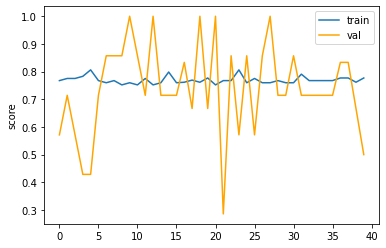

score of model: 0.7058823529411765


LogisticRegression(solver='newton-cg', warm_start=True)

In [6]:
#using function main to choose model, add features and train the model. If satisfied with the score, saving the model. 
main(df=df1)

In [105]:
#loading the model for further usage. 
import pickle

with open(file="model2.sav", mode="rb") as model_save:
    model = pickle.load(model_save)
type(model)

sklearn.svm._classes.SVC

In [106]:
model

SVC(kernel='linear')

In [11]:
df1["duracion"].values

array([  7.   ,  21.   ,  57.   , 101.   , 109.   , 125.   , 133.   ,
       162.   , 170.   , 217.   , 266.   , 335.   , 553.   , 798.   ,
       872.   ,   1.105,   2.091,  21.   ,  33.   ,  49.   ,  74.   ,
        93.   , 145.   , 152.   , 208.   , 219.   , 235.   , 257.   ,
       266.   , 275.   , 355.   , 473.   , 485.   , 652.   , 848.   ,
         2.   ,   9.   , 739.   , 898.   ,   1.401,  11.   ,  31.   ,
        51.   ,  89.   , 112.   , 278.   , 674.   ,   1.088,   1.294,
         1.   ,   2.   ,   7.   ,  10.   ,  12.   ,  14.   ,  20.   ,
        23.   ,  50.   ,  54.   ,  68.   ,  85.   ,  86.   ,  87.   ,
       105.   , 116.   , 117.   , 146.   , 195.   , 230.   , 293.   ,
       304.   , 319.   , 530.   , 584.   , 608.   , 643.   , 649.   ,
       783.   ,   1.169,   1.284,   1.425,   1.478,   1.59 ,   2.041,
         2.695,   3.085,  15.   ,  29.   ,  30.   ,   1.064,  15.   ,
        29.   ,  30.   ,   1.064,  11.   ,  12.   ,  13.   ,  11.   ,
        12.   ,  13.